In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   trestbps      303 non-null    int64  
 4   chol          303 non-null    int64  
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            303 non-null    object 
 12  thal          303 non-null    object 
 13  heartdisease  303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [5]:
for col in df.columns:
    if df[col].dtypes in ['object']:
        df[col]=pd.to_numeric(df[col],errors='coerce').astype('Int64')

<Axes: >

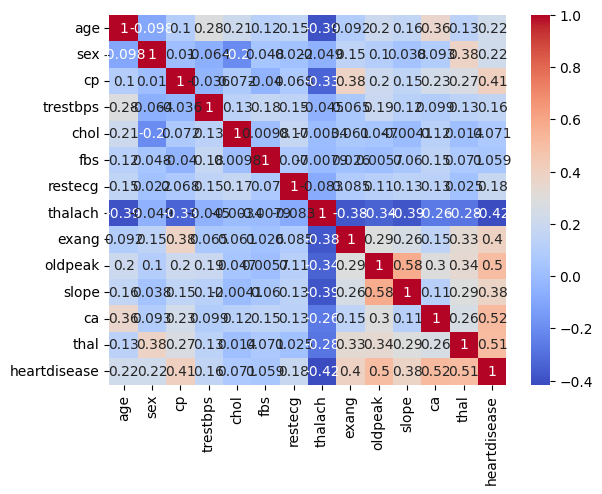

In [6]:
sns.heatmap(df.corr(),annot= True,cmap = 'coolwarm')

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.0,301.0,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.0,3.0,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.0,3.0,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.0,3.0,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.0,7.0,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.0,7.0,4.000000


In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [9]:
df.duplicated().sum()
df.isnull().sum()
df.dropna(inplace=True)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc,roc_curve, accuracy_score,classification_report,confusion_matrix

In [11]:
from sklearn.svm import SVC

In [12]:
X = df.drop(columns =['heartdisease'])
y = df['heartdisease']
X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
kernel_list = ['linear','rbf','poly']


In [13]:
accuracy = []
for k in kernel_list:
    model= SVC(kernel = k)
    model.fit(X_train,Y_train)

    y_pred = model.predict(x_test)
    accuracy.append(accuracy_score(y_pred,y_test))

In [14]:
accuracy

[0.6166666666666667, 0.6, 0.6]

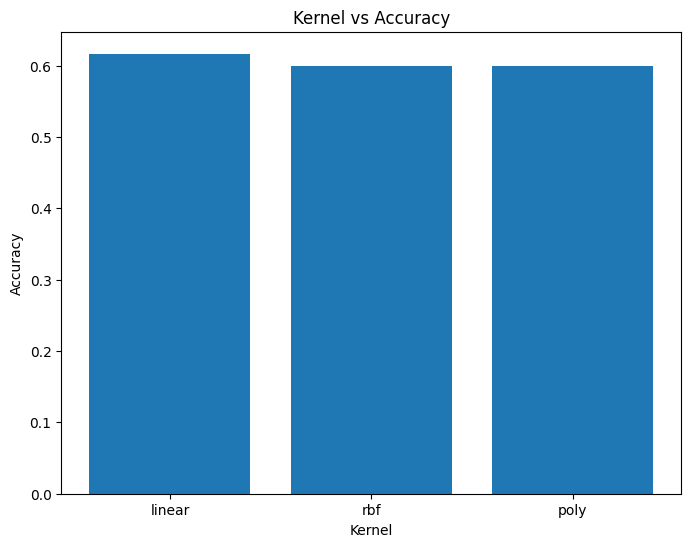

In [15]:
plt.figure(figsize = (8,6))
plt.bar(kernel_list,accuracy)
plt.title('Kernel vs Accuracy')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.show()

In [16]:
model= SVC(kernel = 'linear')
model.fit(X_train,Y_train)
y_pred = model.predict(x_test)
print("Accuracy:",accuracy_score(y_pred,y_test))
print(classification_report(y_test,y_pred))

Accuracy: 0.6166666666666667
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        36
           1       0.00      0.00      0.00         9
           2       0.40      0.40      0.40         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.24      0.27      0.25        60
weighted avg       0.50      0.62      0.55        60



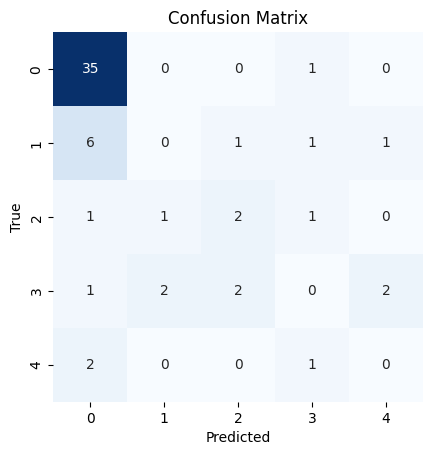

In [17]:
conf_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat,cmap ='Blues',annot=True,cbar = False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()